In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pmdarima import auto_arima
import statsmodels.tools.eval_measures as metrics
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
data  = pd.read_csv('AirPassengers (1).csv', index_col=False)
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
data.columns = ['Date','Passengers']
data ['Date']=pd.to_datetime(data['Date'], format='%Y-%m-%d')
data.set_index('Date', inplace= True)
data

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [5]:
split_date = pd.to_datetime("1958-11-01", format='%Y-%m-%d')

data_train = data[data.index <= split_date]
data_test = data[data.index > split_date]

In [6]:
data.shape

(144, 1)

In [7]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


Text(0, 0.5, 'Passengers')

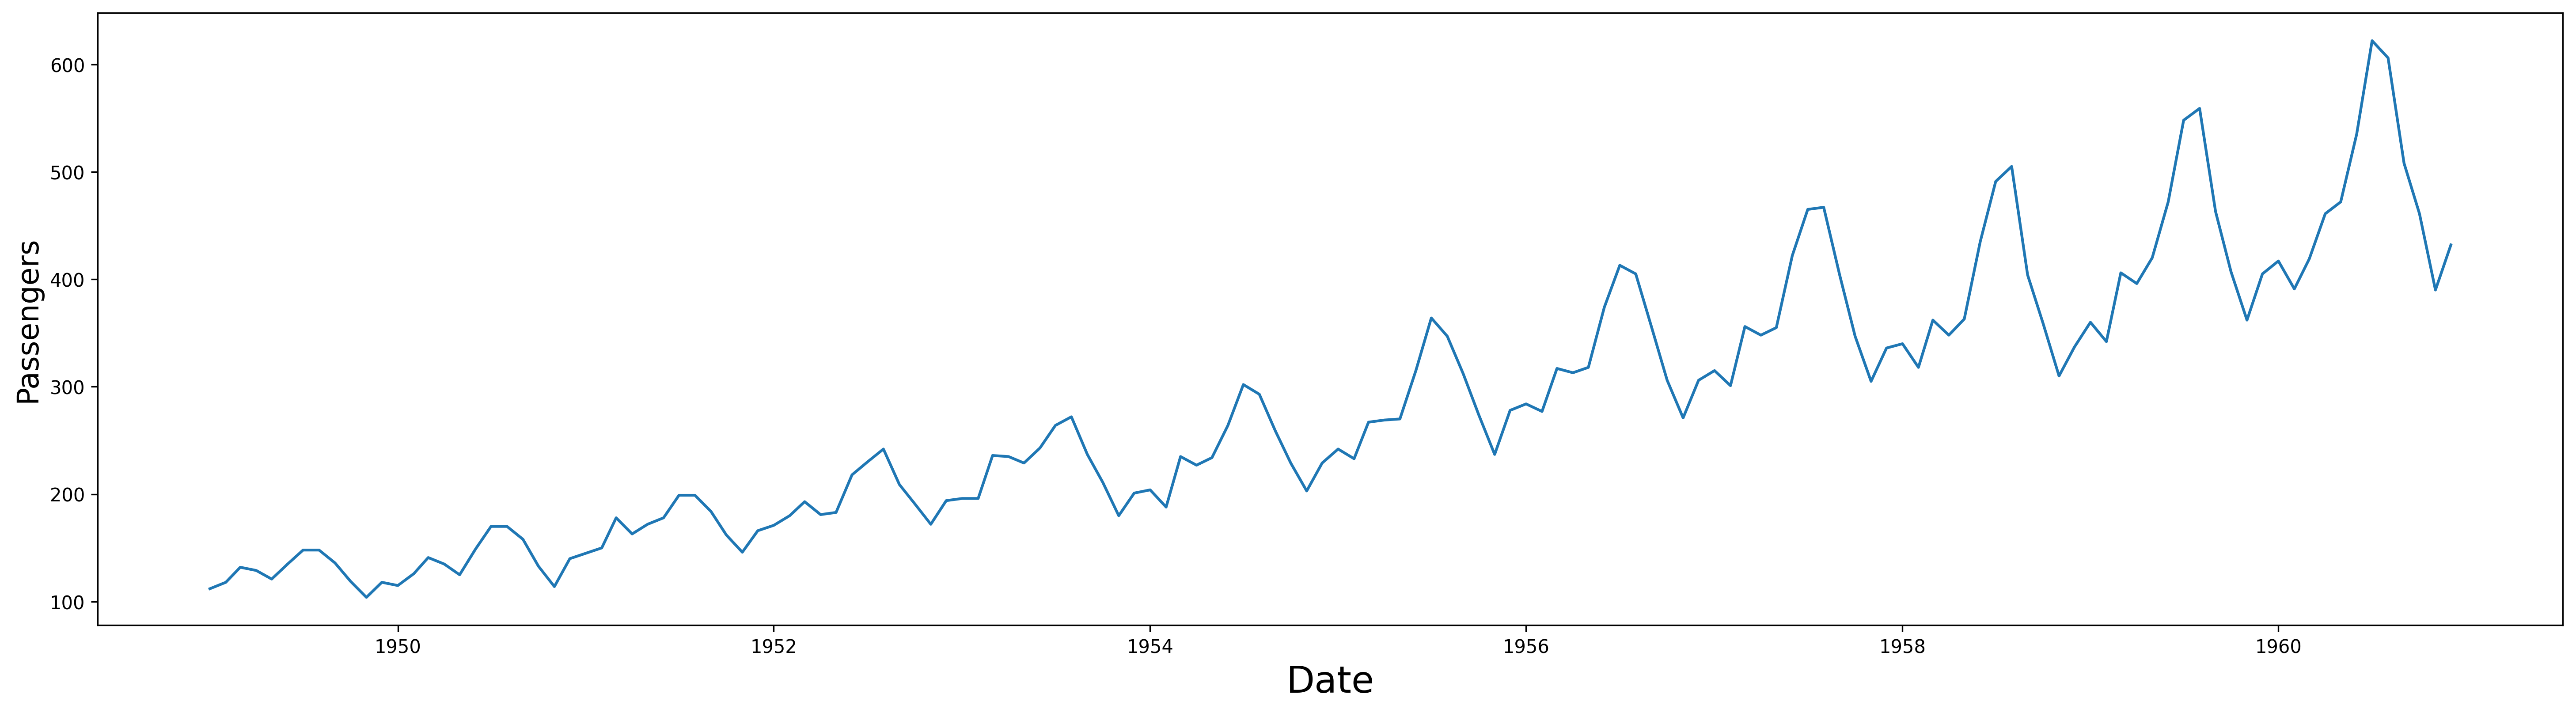

In [8]:
plt.figure(figsize=(24,6), dpi=300)
plt.plot(data)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Passengers', fontsize=16)

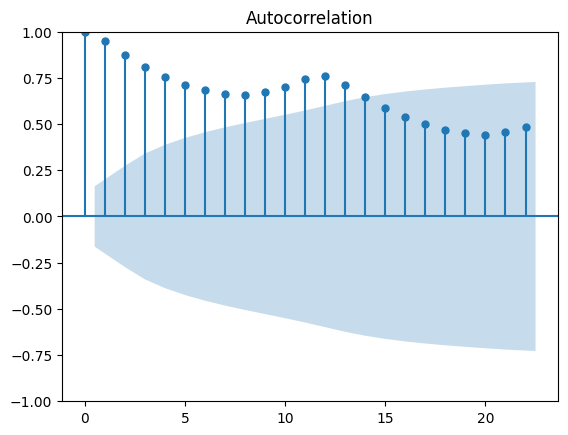

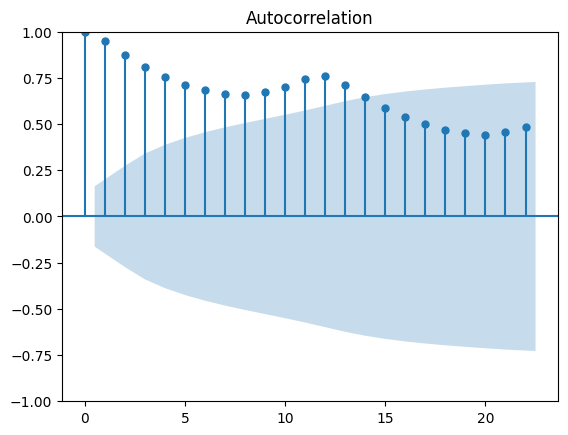

In [9]:
plot_acf(data)

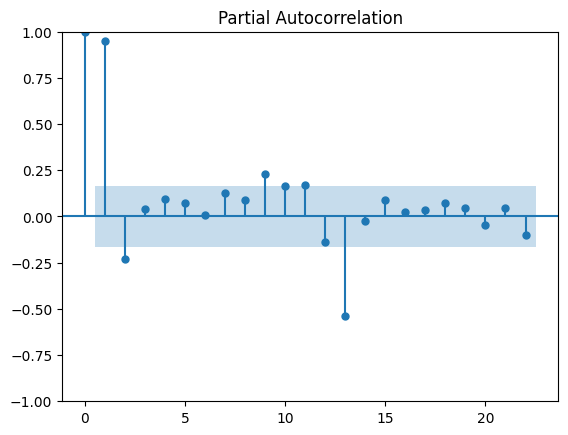

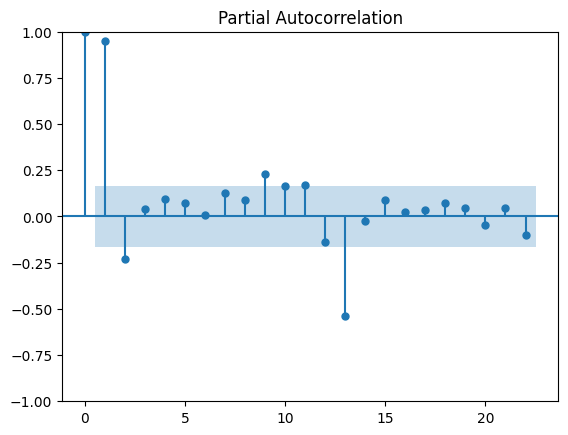

In [10]:
plot_pacf(data)

Text(0.5, 0.98, 'Мультиплікативна декомпозиція')

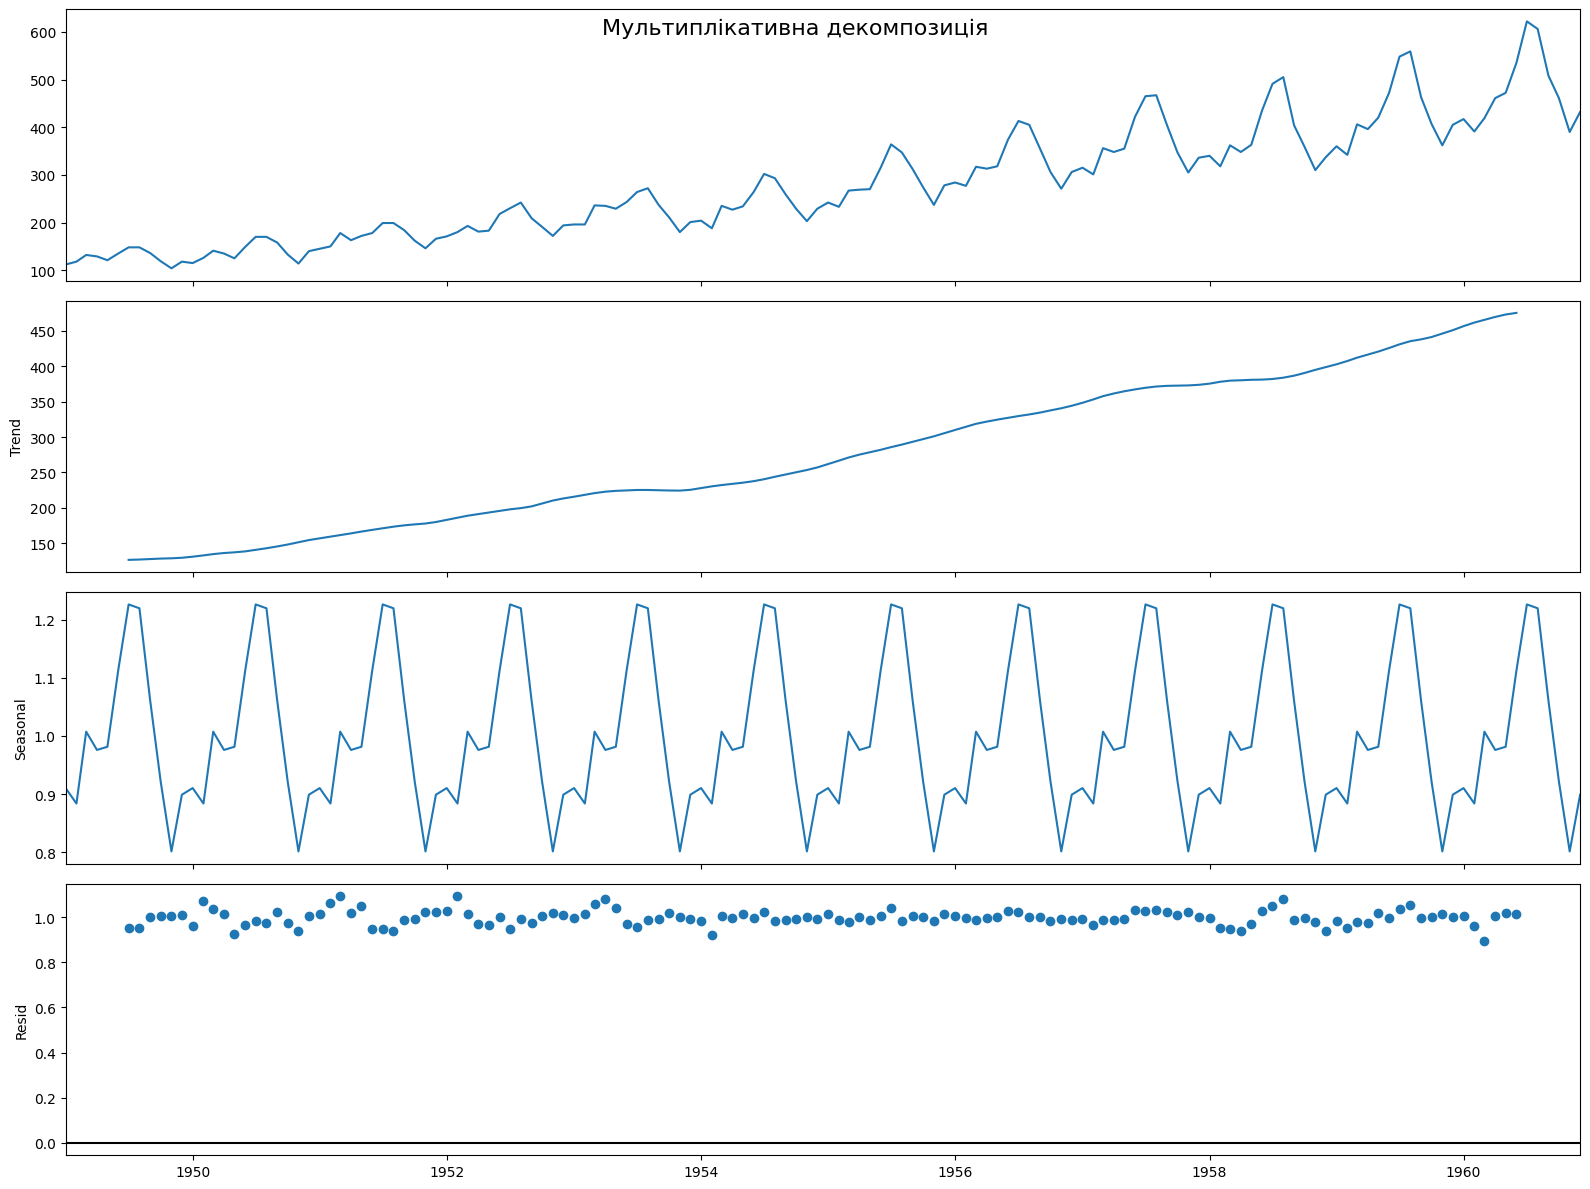

In [11]:
decompose = seasonal_decompose(data,model='multiplicative', period=12)

plt.rcParams.update({'figure.figsize': (16,12)})
decompose.plot().suptitle('Мультиплікативна декомпозиція', fontsize=16)


# Model ARIMA

In [12]:
arima = sm.tsa.ARIMA(data_train, order=(12,1,12)).fit()


In [13]:
arima.summary(1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  119
Model:               ARIMA(12, 1, 12)   Log Likelihood                -442.585
Date:                Mon, 18 Sep 2023   AIC                            935.170
Time:                        11:54:31   BIC                           1004.437
Sample:                    01-01-1949   HQIC                           963.294
                         - 11-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|        [0.5        0.5]
------------------------------------------------------------------------------
ar.L1          0.0907      0.590      0.154      0.878       0.091       0.091
ar.L2         -0.1093      0.575     -0.190      0.849      -0.109      -0.109
ar.L3          0.0782      0.590      0.132      0.895       0.078       0.078
ar.L4         -0.0735      0.564     -0.130      0.896      -0.073      -0.073
ar.L5          0.0694      0.570      0.122      0.903       0.069       0.069
ar.L6         -0.0984      0.547     -0.180      0.857      -0.098      -0.098
ar.L7          0.0539      0.573      0.094      0.925       0.054       0.054
ar.L8         -0.1027      0.551     -0.186      0.852      -0.103      -0.103
ar.L9          0.0280      0.580      0.048      0.962       0.028       0.028
ar.L10        -0.0739      0.526     -0.141      0.888      -0.074      -0.074
ar.L11         0.0620      0.545      0.114      0.909       0.062       0.062
ar.L12         0.8654      0.528      1.638      0.101       0.865       0.865
ma.L1         -0.2973      0.611     -0.487      0.627      -0.297      -0.297
ma.L2          0.1020      0.703      0.145      0.885       0.102       0.102
ma.L3         -0.2514      0.694     -0.362      0.717      -0.251      -0.251
ma.L4         -0.1081      0.759     -0.142      0.887      -0.108      -0.108
ma.L5          0.1021      0.640      0.160      0.873       0.102       0.102
ma.L6         -0.0134      0.536     -0.025      0.980      -0.013      -0.013
ma.L7         -0.0249      0.494     -0.050      0.960      -0.025      -0.025
ma.L8         -0.1047      0.488     -0.215      0.830      -0.105      -0.105
ma.L9          0.1340      0.374      0.358      0.720       0.134       0.134
ma.L10        -0.1049      0.249     -0.422      0.673      -0.105      -0.105
ma.L11         0.2314      0.264      0.878      0.380       0.231       0.231
ma.L12        -0.1754      0.168     -1.046      0.295      -0.175      -0.175
sigma2        78.9707     12.989      6.080      0.000      78.971      78.971
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                10.79
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               2.68   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

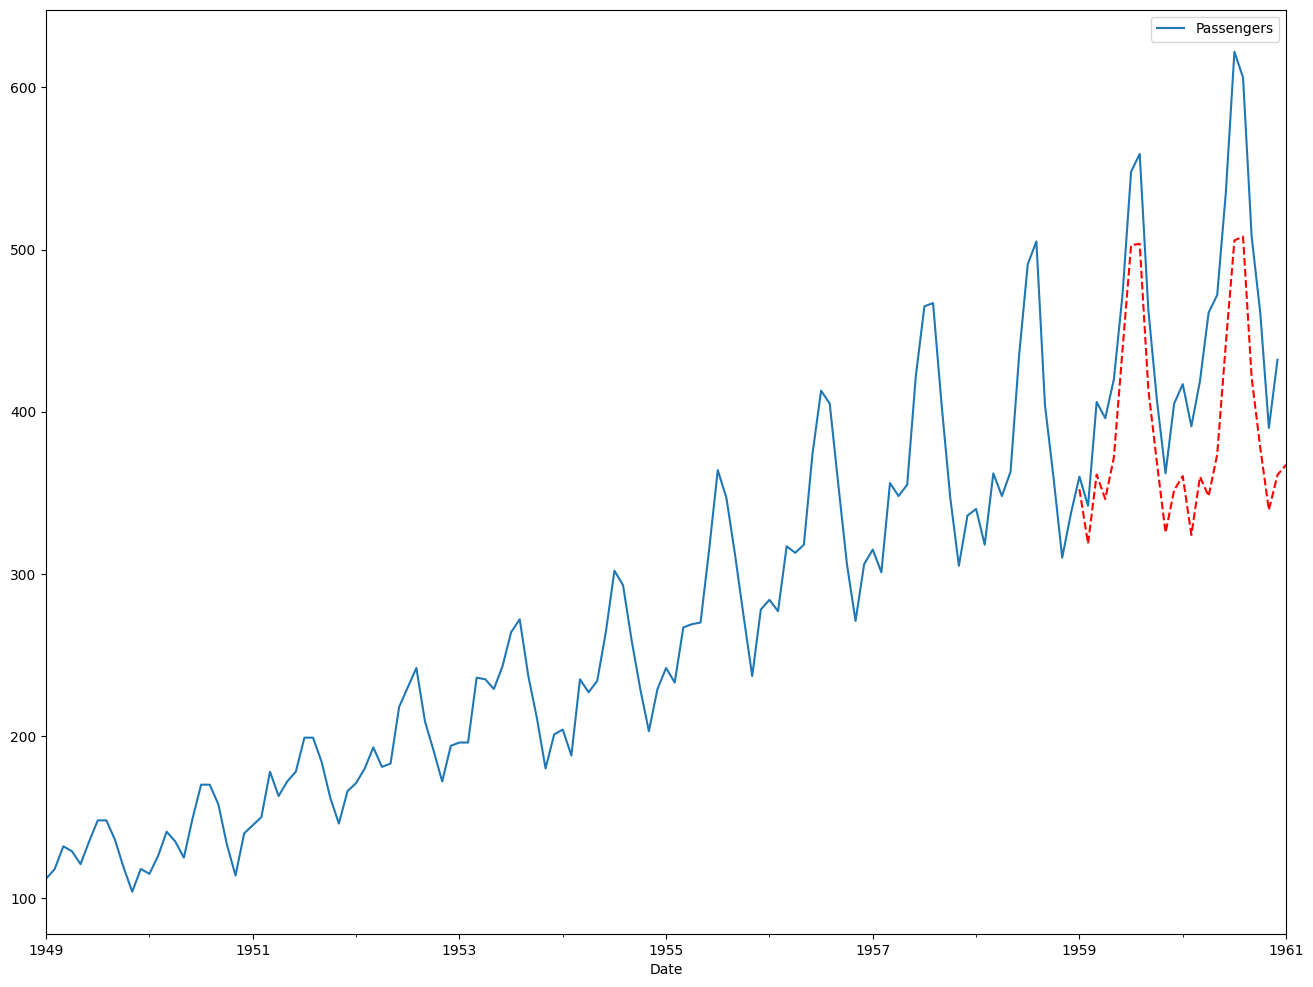

In [14]:
pred_ARIMA = arima.predict(120,144)
data.plot()
pred_ARIMA.plot(style='r--')

In [25]:
mae_arima = mean_absolute_error(data_test,pred_ARIMA)
rmse_arima = np.sqrt(mean_squared_error(data_test,pred_ARIMA))
mae_arima, rmse_arima

(64.62954249182413, 79.1293049481298)

# Model SARIMAX

In [17]:
auto_arima = auto_arima(data_train, seasonal=True, m=12, trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=805.863, Time=0.69 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=899.922, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=803.454, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=852.518, Time=0.10 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1051.673, Time=0.01 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=802.257, Time=0.04 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=803.527, Time=0.10 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=805.382, Time=0.23 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=801.679, Time=0.05 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=803.256, Time=0.17 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=803.333, Time=0.13 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=801.818, Time=0.08 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=802.047, Time=0.07 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept  

In [18]:
model_SARIMAX = sm.tsa.statespace.SARIMAX(data_train,order=(1,1,0), seasonal_order=(0,1,0,12)).fit()

In [19]:
model_SARIMAX.summary(0)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  119
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -396.247
Date:                            Mon, 18 Sep 2023   AIC                            796.494
Time:                                    11:54:34   BIC                            801.821
Sample:                                01-01-1949   HQIC                           798.653
                                     - 11-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|        [0.0        1.0]
------------------------------------------------------------------------------
ar.L1         -0.2431      0.092     -2.650      0.008        -inf         inf
sigma2       103.3297     12.530      8.246      0.000        -inf         inf
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.92   Prob(JB):                         0.40
Heteroskedasticity (H):               1.42   Skew:                             0.01
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
pred_SARIMAX = model_SARIMAX.predict(120,144)

In [26]:
mae_SARIMAX = mean_absolute_error(data_test,pred_SARIMAX)
rmse_SARIMAX = np.sqrt(mean_squared_error(data_test,pred_SARIMAX))
mae_SARIMAX, rmse_SARIMAX


(64.48786361806665, 80.35832571616075)

<Axes: xlabel='Date'>

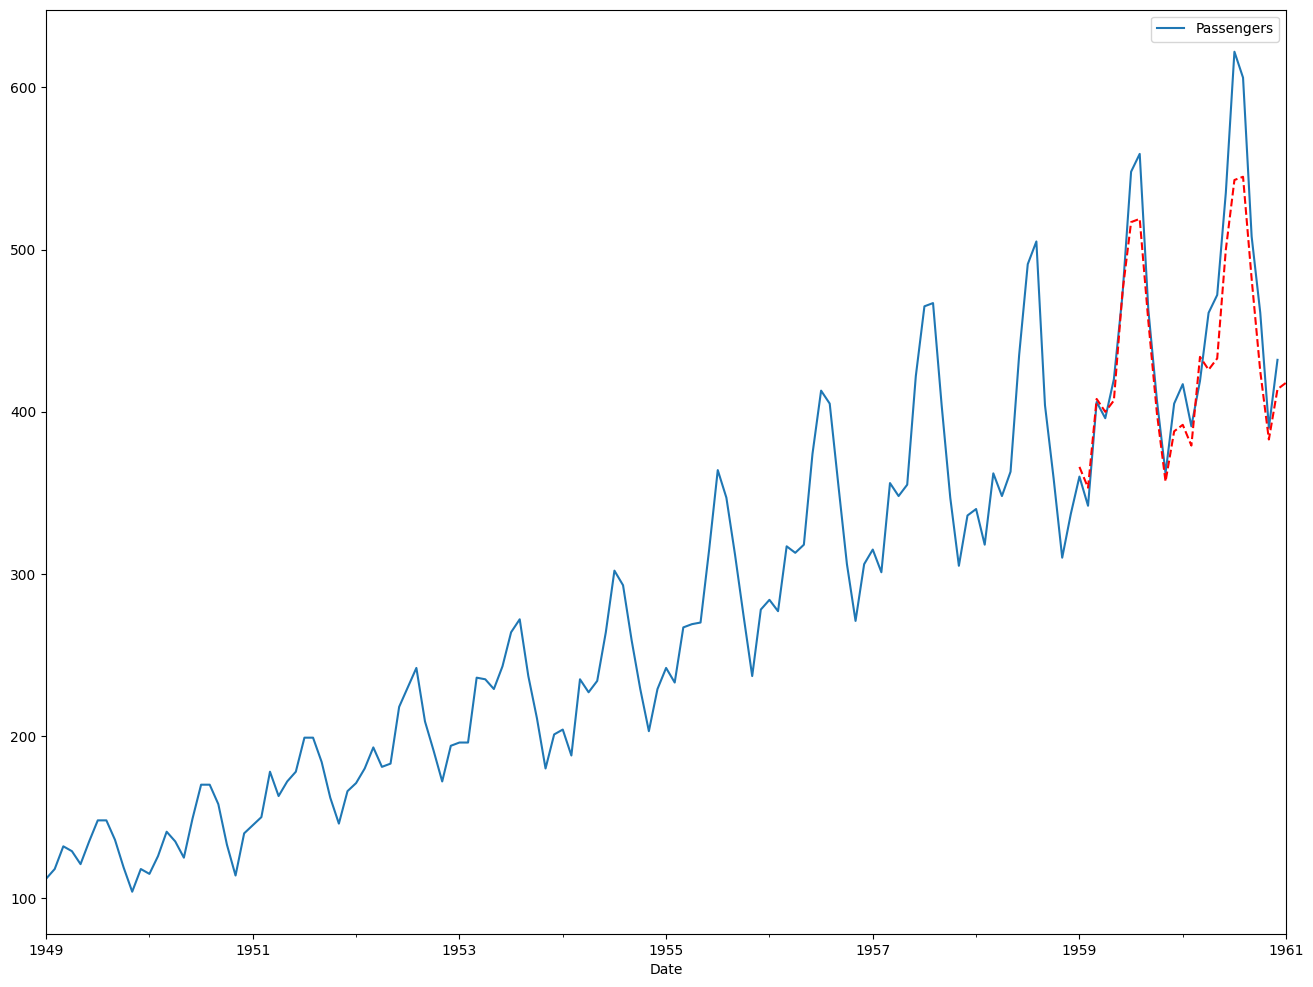

In [ ]:
data.plot()
pred_SARIMAX.plot(style='r--')

# model Holter_Winters

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

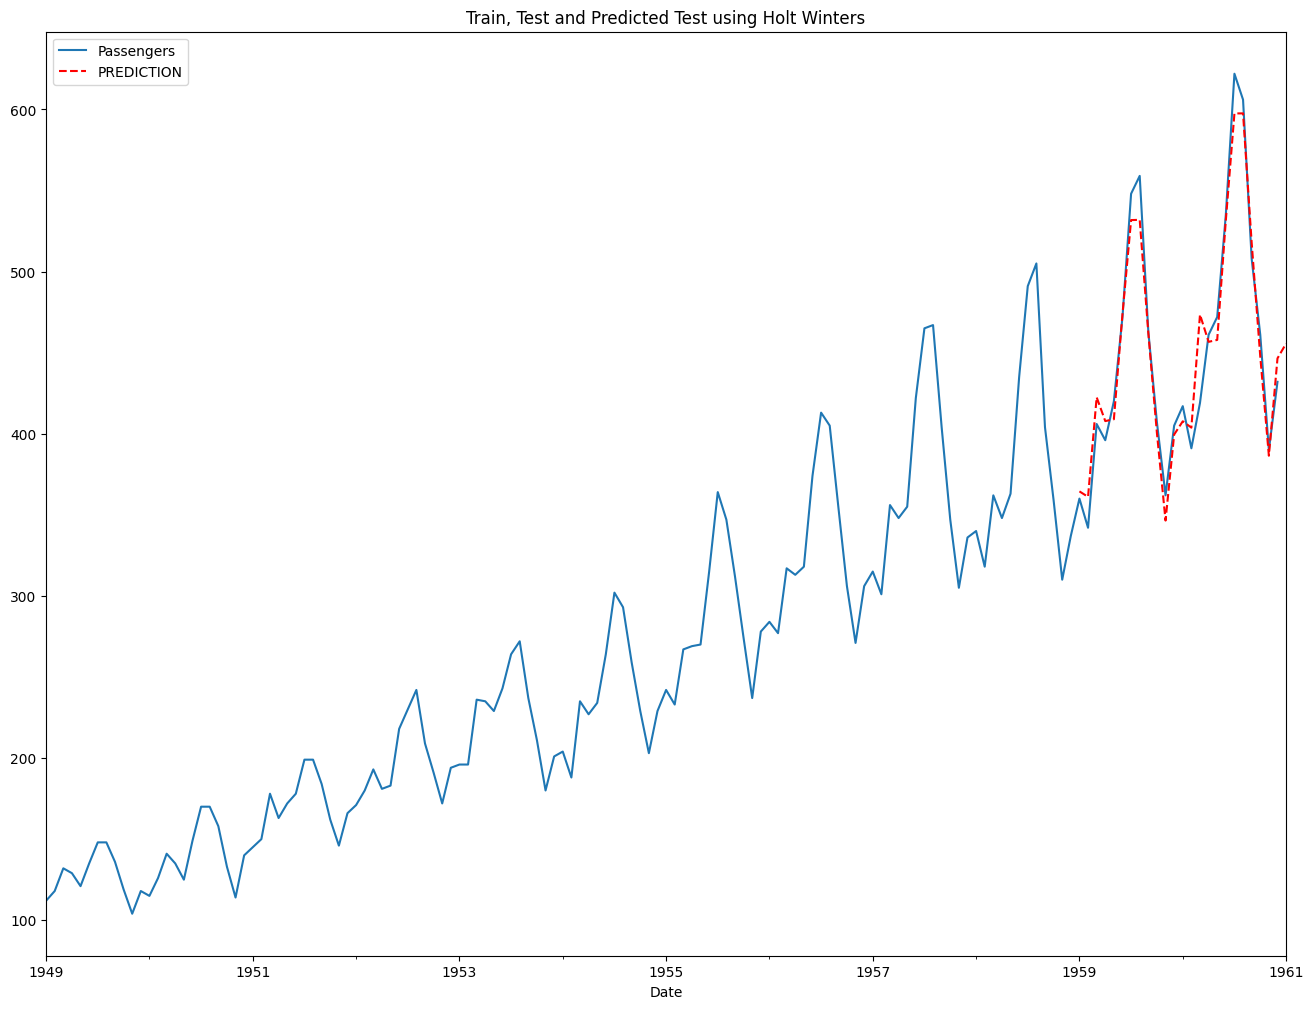

In [29]:
model_HW = ExponentialSmoothing(data_train,trend='add',seasonal='mul',seasonal_periods=12,use_boxcox=True).fit()
pred_HW = model_HW.predict(120,144)
data.plot(legend=True,label='TRAIN')
pred_HW.plot(legend=True,label='PREDICTION',style='r--')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [31]:
mae_HW = mean_absolute_error(data_test,pred_HW)
rmse_HW = np.sqrt(mean_squared_error(data_test,pred_HW))
mae_HW, rmse_HW

(43.98686966873578, 52.78815994036862)

___Порівняльну таблицю не робив оскільки, використовував метрики  з бібліотеки sklern___

__Висновок: Порівнючи прогностики зроблені за допомогою трьох моделів, можу зробити висновок що модель Хольта-Вінтерса оказалась найточнішою, та більш гнучкою при налаштуваннях параметрів.__